In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


(200, 2) (200,)


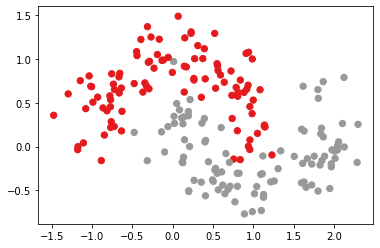

In [39]:
# Generate a dataset and plot it
np.random.seed(42)
X, y = make_moons(200, noise=0.20)
print(X.shape, y.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Set1);

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(150, 2) (150,) (50, 2) (50,)


In [41]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def initialize(dim):

    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    return w, b 

In [52]:
def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [53]:
model(X_train, y_train, 0.01, 100)

ValueError: operands could not be broadcast together with shapes (150,) (1,2) 

In [50]:
def train(X, Y, lr = 0.001):
    # n_samples, n_features = X.shape
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    w, b = initialize(n)
    print(X.shape, w.shape)

    for i in range(1000):
        z = np.dot(w.T, X) + b
        y_hat = sigmoid(z)

        # cost = np.sum(((- np.log(y_hat))*Y + (-np.log(1-y_hat))*(1-Y)))/m
        
        cost = -(1/m)*np.sum( Y*np.log(y_hat) + (1-Y)*np.log(1-y_hat))
        
        dw = (1/n_samples) * np.dot(X.T, (y_hat - Y))
        db = (1/n_samples) * np.sum(y_hat-Y)
        # print(dw.shape, db.shape)

        w = w - (lr*dw)
        b = b - (lr*db)

        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

        
        

In [51]:
train(X_train, y_train)

(150, 2) (150, 1)


ValueError: operands could not be broadcast together with shapes (150,) (1,2) 

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            print(self.weights.shape, X.shape)
            linear_pred = np.dot(X, self.weights) + self.bias
            
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
# clf.predict(X_test)

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def initialize(dim):

    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    return w, b  

def forward_pass(w, b, X, Y):
    
    
    m = X.shape[1] 
    z = np.dot(w.T, X) + b
    y_hat = sigmoid(z)
    cost = np.sum(((- np.log(y_hat))*Y + (-np.log(1-y_hat))*(1-Y)))/m
    
    return m, y_hat, cost

def backward_pass(m, y_hat, X, Y):


    dw = (np.dot(X,(y_hat-Y).T))/m
    db = (np.sum(y_hat-Y))/m

    # dw = (np.dot(X,(A-Y).T))/m
    # db = (np.sum(A-Y))/m

    return dw, db

def train(w, b, X, Y, iterations, lr = 0.001):

    costs = []
    for i in range(iterations):
        m, y_hat, cost = forward_pass(w, b, X, Y)
        dw, db = backward_pass(m, y_hat, X, Y)
        # print(w.shape, dw.shape, X.shape)
        w = w - (lr*dw)
        b = b - (lr*db)
        
        if i % 100 == 0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" %(i, cost))
            # print(w.shape, b)

    return w, b, costs

def predict(w, b, X):
    m = X.shape[1]
    print(X.shape, w.shape)
    Y_prediction = np.zeros((1,m))
    # w = w.reshape(X.shape[0], 1)

    y_hat = sigmoid(np.dot(w.T,X) + b)           
    Y_prediction = (y_hat >= 0.5) * 1.0
    # print(Y_prediction.flatten().shape)
    assert(Y_prediction.shape == (1, m))
    return Y_prediction


def model(X_train, y_train, X_test, y_test, iterations = 200, lr = 0.01):
    y_train = y_train.reshape(y_train.shape[0], 1)
    y_test = y_test.reshape(y_test.shape[0], 1)

    w, b = initialize(X_train.shape[0])
    w, b, costs = train(w, b, X_train, y_train, iterations, lr)

    y_pred_train = predict(w, b, X_train)
    y_pred_test = predict(w, b, X_test)
    

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))
    


In [ ]:
model(X_train, y_train, X_test, y_test)

In [ ]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
train(w, b, X, Y, 1000, 0.1)

In [ ]:
w, b = initialize(2)
print(w.T)

In [ ]:
sigmoid(0.2)

# Model building process?

<ul>
  <li> Define model structure. </li>
  <li> Model parameter initialization</li>
  <li>Trainig loop
    <ul>
      <li>Forward propagation (Calculate loss)</li>
      <li>Backward propagetion (Calculate gradient)</li>
      <li>Update (Gradient descent)</li>
    </ul>
  </li>
</ul>